<a href="https://colab.research.google.com/github/Mahe077/19000774-Assignment/blob/master/coordinate_scrambling_with_Arnold_scrambler.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [40]:
# import torch

# def rearrange_matrix(input_matrix, location_matrix):
#   """
#   Rearranges a PyTorch tensor (matrix) based on another tensor containing destination indices.

#   Args:
#     input_matrix: A PyTorch tensor of shape (1, 3, 256, 256).
#     location_matrix: A PyTorch tensor of shape (256, 256) containing destination indices.

#   Returns:
#     A PyTorch tensor with the rearranged elements, also of shape (1, 3, 256, 256).
#   """

#   # Flatten the input matrix
#   flat_input = input_matrix.view(-1)

#   # Reshape the location matrix to match the flattened input
#   reshaped_locations = location_matrix.view(-1)

#   # Create an empty tensor for rearranged elements
#   rearranged_flat = torch.empty_like(flat_input, device=input_matrix.device)

#   # Custom kernel for efficient rearrangement
#   kernel = torch.nn.functional.scatter_add(rearranged_flat, reshaped_locations, flat_input)

#   # Return the rearranged matrix with original shape
#   return kernel.view_as(input_matrix)

# # Example usage
# input_matrix = torch.randn(1, 3, 256, 256)
# location_matrix = torch.randint(0, 256 * 256, size=(256, 256))

# rearranged_matrix = rearrange_matrix(input_matrix, location_matrix)

# print(rearranged_matrix.shape)  # Output: torch.Size([1, 3, 256, 256])


In [41]:
import torch

a = torch.rand(3,4,4)
print(a)

tensor([[[0.1717, 0.8952, 0.1332, 0.4435],
         [0.0374, 0.3772, 0.0153, 0.3540],
         [0.9079, 0.5264, 0.5574, 0.8379],
         [0.0236, 0.6879, 0.3528, 0.6216]],

        [[0.1781, 0.3673, 0.4807, 0.8098],
         [0.5446, 0.0522, 0.1632, 0.1338],
         [0.8166, 0.5314, 0.6510, 0.8002],
         [0.0915, 0.7141, 0.5899, 0.0385]],

        [[0.1558, 0.7253, 0.8873, 0.7705],
         [0.7812, 0.7681, 0.0267, 0.2920],
         [0.8387, 0.9674, 0.6291, 0.0137],
         [0.1468, 0.5189, 0.1054, 0.4580]]])


In [42]:
print(a[0:,0,0])

tensor([0.1717, 0.1781, 0.1558])


In [43]:
a[0:,0,0] = 1
print(a)

tensor([[[1.0000, 0.8952, 0.1332, 0.4435],
         [0.0374, 0.3772, 0.0153, 0.3540],
         [0.9079, 0.5264, 0.5574, 0.8379],
         [0.0236, 0.6879, 0.3528, 0.6216]],

        [[1.0000, 0.3673, 0.4807, 0.8098],
         [0.5446, 0.0522, 0.1632, 0.1338],
         [0.8166, 0.5314, 0.6510, 0.8002],
         [0.0915, 0.7141, 0.5899, 0.0385]],

        [[1.0000, 0.7253, 0.8873, 0.7705],
         [0.7812, 0.7681, 0.0267, 0.2920],
         [0.8387, 0.9674, 0.6291, 0.0137],
         [0.1468, 0.5189, 0.1054, 0.4580]]])


In [44]:
b = torch.randn(3,4)
print(b)
print(b[:, (b > -1).all(axis=0)])

tensor([[-0.9360, -0.6668, -2.3268, -0.4595],
        [ 0.0738, -1.0714,  1.4456, -0.1339],
        [ 0.9721,  0.9709,  1.2109,  1.3719]])
tensor([[-0.9360, -0.4595],
        [ 0.0738, -0.1339],
        [ 0.9721,  1.3719]])


In [45]:
rows, cols = 4, 4  # You can adjust the dimensions as needed

# Generate a 2D matrix containing coordinates
coordinate_matrix = torch.tensor([[(i, j) for j in range(cols)] for i in range(rows)])

# Print the generated matrix
for row in coordinate_matrix:
    print(row)

tensor([[0, 0],
        [0, 1],
        [0, 2],
        [0, 3]])
tensor([[1, 0],
        [1, 1],
        [1, 2],
        [1, 3]])
tensor([[2, 0],
        [2, 1],
        [2, 2],
        [2, 3]])
tensor([[3, 0],
        [3, 1],
        [3, 2],
        [3, 3]])


In [46]:
# Define the 2x2 matrix for multiplication
matrix_to_multiply = torch.tensor([[1, 1], [1, 2]])
temp = coordinate_matrix.view(-1, 2)
print(temp, temp.shape, coordinate_matrix.shape)

# Perform element-wise multiplication using PyTorch's operations
result_matrix = torch.matmul(temp, matrix_to_multiply).view(rows, cols, 2)
result = torch.fmod(result_matrix,rows)

# Print the generated matrix
print(result_matrix,"\n")
print(result)

tensor([[0, 0],
        [0, 1],
        [0, 2],
        [0, 3],
        [1, 0],
        [1, 1],
        [1, 2],
        [1, 3],
        [2, 0],
        [2, 1],
        [2, 2],
        [2, 3],
        [3, 0],
        [3, 1],
        [3, 2],
        [3, 3]]) torch.Size([16, 2]) torch.Size([4, 4, 2])
tensor([[[0, 0],
         [1, 2],
         [2, 4],
         [3, 6]],

        [[1, 1],
         [2, 3],
         [3, 5],
         [4, 7]],

        [[2, 2],
         [3, 4],
         [4, 6],
         [5, 8]],

        [[3, 3],
         [4, 5],
         [5, 7],
         [6, 9]]]) 

tensor([[[0, 0],
         [1, 2],
         [2, 0],
         [3, 2]],

        [[1, 1],
         [2, 3],
         [3, 1],
         [0, 3]],

        [[2, 2],
         [3, 0],
         [0, 2],
         [1, 0]],

        [[3, 3],
         [0, 1],
         [1, 3],
         [2, 1]]])


In [47]:
import matplotlib.pyplot as plt

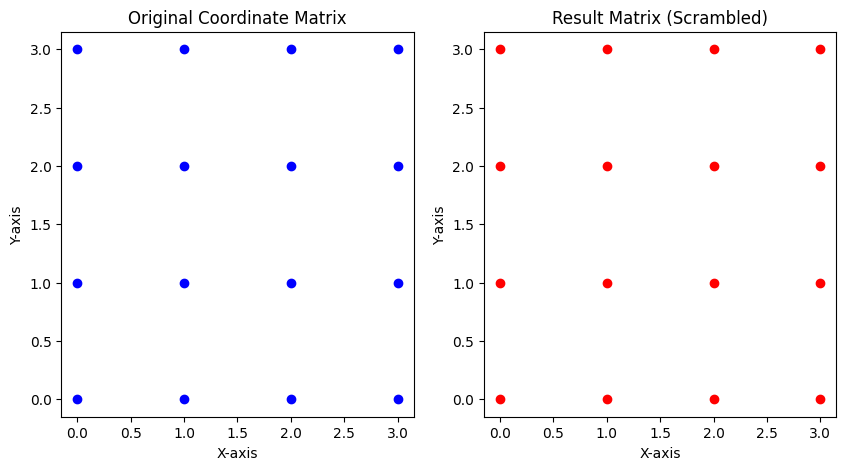

In [48]:
# Plot the original and result matrices
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Original Coordinate Matrix
axs[0].scatter(coordinate_matrix[:,:,0], coordinate_matrix[:,:,1], c='blue', label='Original')
axs[0].set_title('Original Coordinate Matrix')
axs[0].set_xlabel('X-axis')
axs[0].set_ylabel('Y-axis')

# Result Matrix
axs[1].scatter(result[:,:,0], result[:,:,1], c='red', label='Scrambled')
axs[1].set_title('Result Matrix (Scrambled)')
axs[1].set_xlabel('X-axis')
axs[1].set_ylabel('Y-axis')

plt.show()

In [55]:
inverse_mult_matrix = torch.tensor([[2,-1],[-1,1]])
print(inverse_mult_matrix)
temp_2 = result.view(-1,2)
print(temp_2)
recoverd_matrix = torch.matmul(temp_2,inverse_mult_matrix).view(rows,cols,2)
print(recoverd_matrix)
add = torch.add(recoverd_matrix,4)
print("add\n",add)
recoverd = torch.fmod(add,rows)
print(recoverd)

tensor([[ 2, -1],
        [-1,  1]])
tensor([[0, 0],
        [1, 2],
        [2, 0],
        [3, 2],
        [1, 1],
        [2, 3],
        [3, 1],
        [0, 3],
        [2, 2],
        [3, 0],
        [0, 2],
        [1, 0],
        [3, 3],
        [0, 1],
        [1, 3],
        [2, 1]])
tensor([[[ 0,  0],
         [ 0,  1],
         [ 4, -2],
         [ 4, -1]],

        [[ 1,  0],
         [ 1,  1],
         [ 5, -2],
         [-3,  3]],

        [[ 2,  0],
         [ 6, -3],
         [-2,  2],
         [ 2, -1]],

        [[ 3,  0],
         [-1,  1],
         [-1,  2],
         [ 3, -1]]])
add
 tensor([[[ 4,  4],
         [ 4,  5],
         [ 8,  2],
         [ 8,  3]],

        [[ 5,  4],
         [ 5,  5],
         [ 9,  2],
         [ 1,  7]],

        [[ 6,  4],
         [10,  1],
         [ 2,  6],
         [ 6,  3]],

        [[ 7,  4],
         [ 3,  5],
         [ 3,  6],
         [ 7,  3]]])
tensor([[[0, 0],
         [0, 1],
         [0, 2],
         [0, 3]],

       

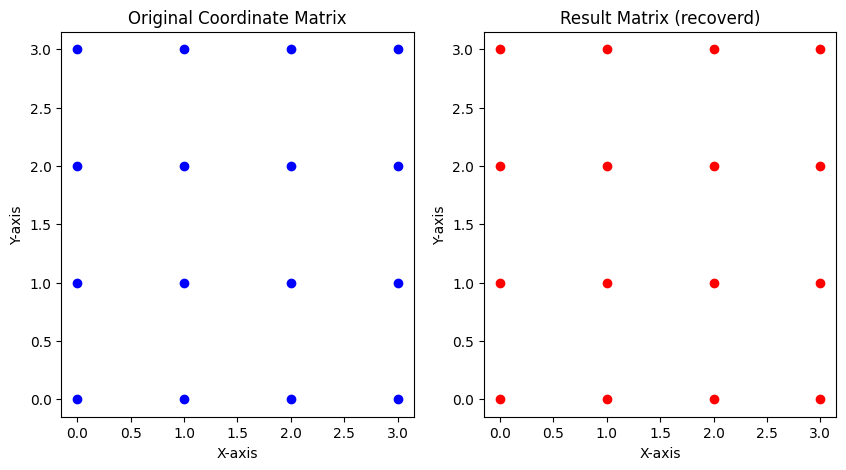

In [56]:
# Plot the original and result matrices
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Original Coordinate Matrix
axs[0].scatter(coordinate_matrix[:,:,0], coordinate_matrix[:,:,1], c='blue', label='Original')
axs[0].set_title('Original Coordinate Matrix')
axs[0].set_xlabel('X-axis')
axs[0].set_ylabel('Y-axis')

# Result Matrix
axs[1].scatter(recoverd[:,:,0], recoverd[:,:,1], c='red', label='recoverd')
axs[1].set_title('Result Matrix (recoverd)')
axs[1].set_xlabel('X-axis')
axs[1].set_ylabel('Y-axis')

plt.show()

In [51]:
temp_3 = result_matrix.view(-1,2)
print(temp_3)
recoverd_matrix_1 = torch.matmul(temp_3,inverse_mult_matrix).view(rows,cols,2)
print(recoverd_matrix_1)
# recoverd_1 = torch.fmod(recoverd_matrix_1,rows)
# print(recoverd_1)

tensor([[0, 0],
        [1, 2],
        [2, 4],
        [3, 6],
        [1, 1],
        [2, 3],
        [3, 5],
        [4, 7],
        [2, 2],
        [3, 4],
        [4, 6],
        [5, 8],
        [3, 3],
        [4, 5],
        [5, 7],
        [6, 9]])
tensor([[[0, 0],
         [0, 1],
         [0, 2],
         [0, 3]],

        [[1, 0],
         [1, 1],
         [1, 2],
         [1, 3]],

        [[2, 0],
         [2, 1],
         [2, 2],
         [2, 3]],

        [[3, 0],
         [3, 1],
         [3, 2],
         [3, 3]]])


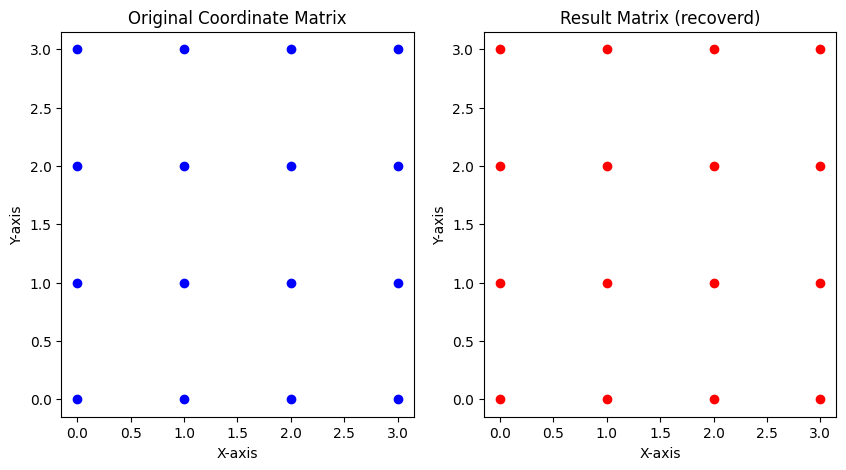

In [52]:
# Plot the original and result matrices
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Original Coordinate Matrix
axs[0].scatter(coordinate_matrix[:,:,0], coordinate_matrix[:,:,1], c='blue', label='Original')
axs[0].set_title('Original Coordinate Matrix')
axs[0].set_xlabel('X-axis')
axs[0].set_ylabel('Y-axis')

# Result Matrix
axs[1].scatter(recoverd_matrix_1[:,:,0], recoverd_matrix_1[:,:,1], c='red', label='recoverd')
axs[1].set_title('Result Matrix (recoverd)')
axs[1].set_xlabel('X-axis')
axs[1].set_ylabel('Y-axis')

plt.show()

In [53]:
from numba import jit, cuda
import numpy as np
# to measure exec time
from timeit import default_timer as timer

# normal function to run on cpu
def func(a):
	for i in range(10000000):
		a[i]+= 1

# function optimized to run on gpu
@jit(target_backend='cuda')
def func2(a):
	for i in range(10000000):
		a[i]+= 1
if __name__=="__main__":
	n = 10000000
	a = np.ones(n, dtype = np.float64)

	start = timer()
	func(a)
	print("without GPU:", timer()-start)

	start = timer()
	func2(a)
	print("with GPU:", timer()-start)


<ipython-input-53-7352539cbc6d>:12: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @jit(target_backend='cuda')


without GPU: 2.3299543940001968
with GPU: 0.07559554199997365
